# Использование библиотек машинного обучения

- **numpy** -- поддержка многомерных массивов (включая матрицы); поддержка высокоуровневых математических функций, предназначенных для работы с многомерными массивами.
- **pandas** -- библиотека для анализа данных, представляет удобную структуру для хранения и предобработки даных
- **scikit-learn** -- библиотека машинного обучения

In [40]:
# Загружаем библиотеке

## Для работы с данными
import numpy as np    # дале в коде будем использовать np, вместо numpy
import pandas as pd

## Библиотека машинного обучения scikit-learn, загружаем нужные функции
from sklearn.datasets import *
from sklearn.preprocessing import *
from sklearn.cross_validation import *
from sklearn.svm import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.metrics import *

# Для вывода графиков
import matplotlib.pyplot as plt
%matplotlib inline

## Задача регресси
Предсказание цены дома на основе заданных параметров

### Строим простейшую модель

In [194]:
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
X = boston.data
Y = boston.target

In [65]:
# Разбиваем выборку на тренировочну 80% и тестировочную 20%
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.8, random_state=324957)

In [66]:
# Определяем модель, Машина опорных векторов
model = SVR(kernel="linear")

# Обучаем
model.fit(train_x, train_y)

# Тестируем
pred = model.predict(test_x)
print("R2 мера: {0}, mse: {1}".format(r2_score(test_y, pred),
                                      mean_squared_error(test_y, pred)))

R2 мера: 0.665791364637, mse: 27.4497856765


In [208]:
# Создаём функцию для проверки модели
def func_check_model(model, X, Y):
    # Добавить кросс валидацию
    
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.8, random_state=324957)
    
    model.fit(train_x, train_y)
    pred = model.predict(test_x)
    print("R2 мера: {0}, mse: {1}".format(r2_score(test_y, pred),
                                          mean_squared_error(test_y, pred)))
    return model

func_check_model(RandomForestRegressor(n_estimators=100), X, Y)

R2 мера: 0.819760112686, mse: 14.8037655333


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

### Анализ данных

In [36]:
# Загружаем в структуру pandas
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston_y = pd.DataFrame(boston.target, columns=["Y"])

In [47]:
# Выводим распределения параметров
df_boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [52]:
for column in df_boston.columns:
    print("{0}: {1}".format(column, len(df_boston[column].unique())))

CRIM: 504
ZN: 26
INDUS: 76
CHAS: 2
NOX: 81
RM: 446
AGE: 356
DIS: 412
RAD: 9
TAX: 66
PTRATIO: 46
B: 357
LSTAT: 455


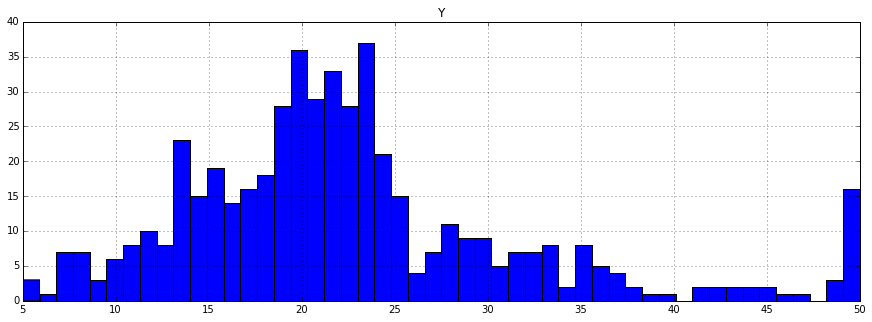

In [53]:
# Гистограмма цен
fig = df_boston_y.hist(bins=50, figsize=(15, 5))

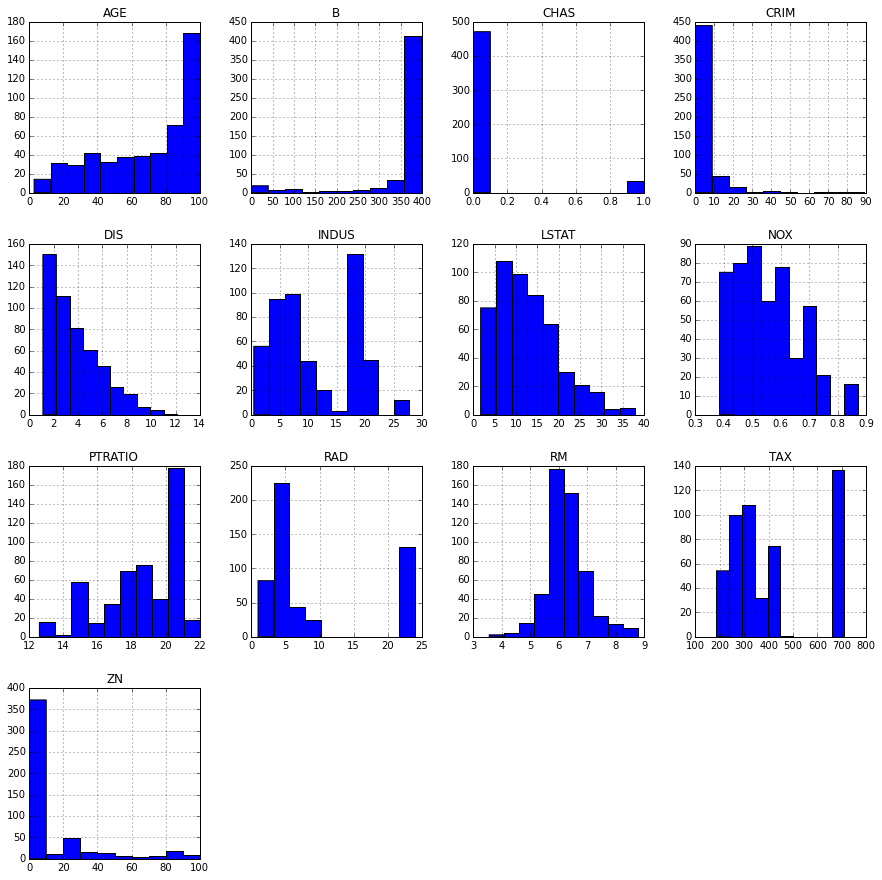

In [56]:
fig = df_boston.hist(figsize=(15, 15))

In [217]:
df_boston_cov = df_boston.copy()
df_boston_cov["Y"] = df_boston_y["Y"]
df_boston_cov.corr()["Y"]

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
CRIM_10   -0.379048
CRIM_30    0.409924
Y          1.000000
Name: Y, dtype: float64

In [225]:
model = func_check_model(RandomForestRegressor(n_estimators=100),
                         df_boston[["LSTAT", "RM"]].values, Y)

R2 мера: 0.727966304992, mse: 22.343128916


In [ ]:
# Классификация
# Кластеризация